# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Do plotting in line instead of in a separate window
%matplotlib inline

## Load and review data

In [2]:
df = pd.read_csv("./data/pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features

|Feature|	Description|	Comments|
|---|----|---|
|num_preg|	number of pregnancies
|glucose_conc|	Plasma glucose concentration a 2 hours in an oral glucose tolerance test
|diastolic_bp|	Diastolic blood pressure (mm Hg)
|thickness|	Triceps skin fold thickness (mm)
|insulin|	2-Hour serum insulin (mu U/ml)
|bmi|	Body mass index (weight in kg/(height in m)^2)
|diab_pred	|Diabetes pedigree function
|Age|	Age (years)
|skin|	????	What is this?
|diabetes|	Class variable (1=True, 0=False)|	Why is our data boolean (True/False)?

In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

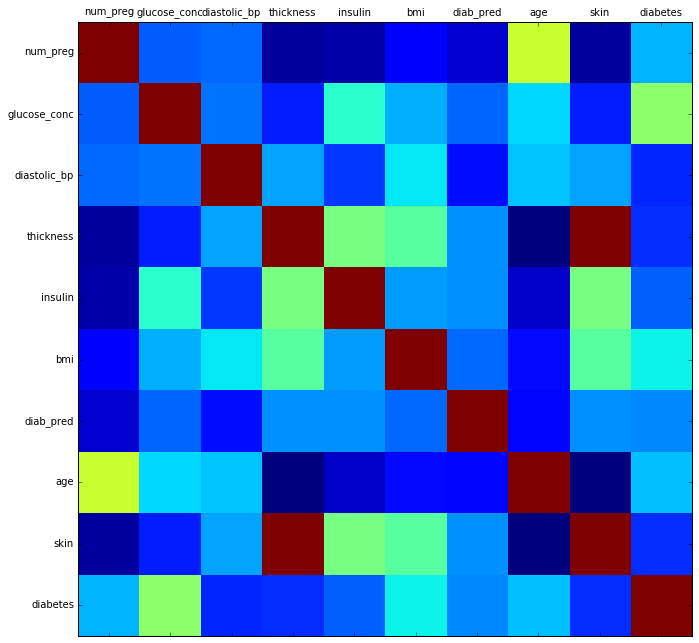

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


## Check Data types

In [11]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


### Change True to 1 and False to 0

In [12]:
diabetesMap = {True:1, False:0}

In [13]:
df['diabetes'] = df['diabetes'].map(diabetesMap)

In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


## Check True/False ratio

In [15]:
numTrue = len(df.loc[df['diabetes'] == True])
numFalse = len(df.loc[df['diabetes'] == False])
print("Num of True cases: {0} ({1:2.2f}%)".format(numTrue, (numTrue/(numTrue+numFalse))*100))
print("Num of False cases: {0} ({1:2.2f}%)".format(numFalse, (numFalse/(numTrue+numFalse))*100))

Num of True cases: 268 (34.90%)
Num of False cases: 500 (65.10%)


### Good distribution of true and false cases. No special work needed.

### Splitting the test data
70% for training and 30% for testing

In [16]:
from sklearn.cross_validation import train_test_split
featureColumnNames = ['num_preg', 'glucose_conc', 'diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predictedclasName = ['diabetes']
x = df[featureColumnNames].values
y = df[predictedclasName].values
splitTestSize = 0.3
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = splitTestSize, random_state = 42)

In [17]:
print("({0:0.2f}%) in training set".format((len(xTrain)/len(df.index)) * 100))
print("({0:0.2f}%) in test set".format((len(xTest)/len(df.index)) * 100))

(69.92%) in training set
(30.08%) in test set


Verifying the predicted value was split correctly

In [18]:
numOfTrainingTrue = len(yTrain[yTrain[:] == 1])
numOfTrainingFalse = len(yTrain[yTrain[:] == 0])

numOfTestTrue = len(yTest[yTest[:] == 1])
numOfTestFalse = len(yTest[yTest[:] == 0])

print("Original True: {0} ({1:2.2f}%)".format(numTrue, (numTrue/(numTrue+numFalse))*100))
print("Original False: {0} ({1:2.2f}%)".format(numFalse, (numFalse/(numTrue+numFalse))*100))

print("Training True  : {0} ({1:0.2f}%)".format(numOfTrainingTrue, (numOfTrainingTrue/len(yTrain) * 100.0)))
print("Training False  : {0} ({1:0.2f}%)".format(numOfTrainingFalse, (numOfTrainingFalse/len(yTrain) * 100.0)))
print("Test True  : {0} ({1:0.2f}%)".format(numOfTestTrue, (numOfTestTrue/len(yTest) * 100.0)))
print("Test False  : {0} ({1:0.2f}%)".format(numOfTestFalse, (numOfTestFalse/len(yTest) * 100.0)))

Original True: 268 (34.90%)
Original False: 500 (65.10%)
Training True  : 188 (35.01%)
Training False  : 349 (64.99%)
Test True  : 80 (34.63%)
Test False  : 151 (65.37%)


In [19]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [20]:
print("# rows is dataset: {0}".format(len(df)))
print("# rows missing num_preg values: {0}".format(len(df.loc[df['num_preg'] == 0])))
print("# rows missing glucose_conc values: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp values: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness values: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin values: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi values: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred values: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age values: {0}".format(len(df.loc[df['age'] == 0])))
print("# rows missing skin values: {0}".format(len(df.loc[df['skin'] == 0])))

# rows is dataset: 768
# rows missing num_preg values: 111
# rows missing glucose_conc values: 5
# rows missing diastolic_bp values: 35
# rows missing thickness values: 227
# rows missing insulin values: 374
# rows missing bmi values: 11
# rows missing diab_pred values: 0
# rows missing age values: 0
# rows missing skin values: 227


Impute with the mean

In [21]:
from sklearn.preprocessing import Imputer
# Impute with mean, all 0 readings
fill0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)
xTrain = fill0.fit_transform(xTrain)
xTest = fill0.fit_transform(xTest)

## Training initial algorithm - Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(xTrain, yTrain.ravel())

GaussianNB()

## Performance on Training Data

In [23]:
# Predict values using the training data
nb_predict_train = nb_model.predict(xTrain)

# import the performance metrics library
from sklearn import metrics
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(yTrain, nb_predict_train)))

Acuracy: 0.7542


## Performance on Testing Data

In [24]:
# Predict values using the testing data
nb_predict_test = nb_model.predict(xTest)

# import the performance metrics library
from sklearn import metrics
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(yTest, nb_predict_test)))

Acuracy: 0.7359


Metrics

In [25]:
print("Confusion Matrix")
# Use labels to set 1 = True to iupper left and 0 = False to lower right
print("{0}\n".format(metrics.confusion_matrix(yTest, nb_predict_test, labels=[1,0])))
print("Classification Report")
print("{0}\n".format(metrics.classification_report(yTest, nb_predict_test, labels=[1,0])))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231




## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(xTrain, yTrain.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Predict Training Data

In [27]:
rf_predict_train = rf_model.predict(xTrain)
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(yTrain, rf_predict_train)))

Acuracy: 0.9870


Predict Test Data

In [29]:
rf_predict_test = rf_model.predict(xTest)
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(yTest, rf_predict_test)))

Acuracy: 0.7100


In [30]:
print("Confusion Matrix for Random Forest")
# Use labels to set 1 = True to iupper left and 0 = False to lower right
print("{0}\n".format(metrics.confusion_matrix(yTest, rf_predict_test, labels=[1,0])))
print("Classification Report")
print("{0}\n".format(metrics.classification_report(yTest, rf_predict_test, labels=[1,0])))

Confusion Matrix for Random Forest
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231




## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C = 0.7, random_state = 42)
lr_model.fit(xTrain, yTrain.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predict Training Test

In [35]:
lr_predict_train = lr_model.predict(xTrain)
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(yTrain, lr_predict_train)))

Acuracy: 0.7728


Predict test Data

In [36]:
lr_predict_test = lr_model.predict(xTest)
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(yTest, lr_predict_test)))

Acuracy: 0.7446


Confusion Matrix for Logistic Regression

In [37]:
print("{0}\n".format(metrics.confusion_matrix(yTest, lr_predict_test, labels=[1,0])))
print("Classification Report")
print("{0}\n".format(metrics.classification_report(yTest, lr_predict_test, labels=[1,0])))

[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231




Setting Regularization parameter

First max value of 0.613 ocurred at C = 1.400


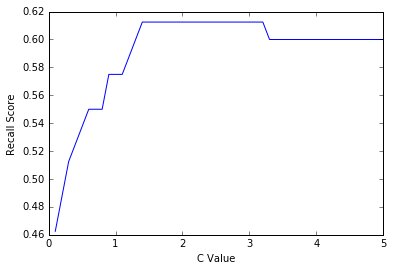

In [46]:
C_start = 0.1
C_end = 5
C_inc = 0.1
C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, random_state=42)
    lr_model_loop.fit(xTrain, yTrain.ravel())
    lr_predict_loop_test = lr_model_loop.predict(xTest)
    recall_score = metrics.recall_score(yTest, lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("First max value of {0:.3f} ocurred at C = {1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C Value")
plt.ylabel("Recall Score")

First max value of 0.738 ocurred at C = 0.300


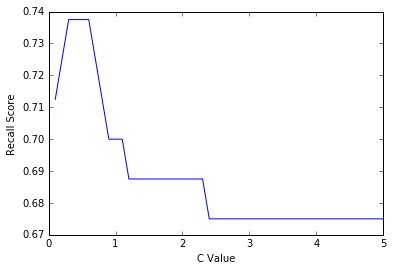

In [47]:
C_start = 0.1
C_end = 5
C_inc = 0.1
C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(xTrain, yTrain.ravel())
    lr_predict_loop_test = lr_model_loop.predict(xTest)
    recall_score = metrics.recall_score(yTest, lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("First max value of {0:.3f} ocurred at C = {1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C Value")
plt.ylabel("Recall Score")

In [48]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight="balanced", C = best_score_C_val, random_state = 42)
lr_model.fit(xTrain, yTrain.ravel())

LogisticRegression(C=0.30000000000000004, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Predict Training Test after the C adjustment and balancing data

In [49]:
lr_predict_train = lr_model.predict(xTrain)
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(yTrain, lr_predict_train)))

Acuracy: 0.7449


Predict test Data

In [50]:
lr_predict_test = lr_model.predict(xTest)
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(yTest, lr_predict_test)))

Acuracy: 0.7143


Confusion Matrix for Logistic Regression

In [51]:
print("{0}\n".format(metrics.confusion_matrix(yTest, lr_predict_test, labels=[1,0])))
print("Classification Report")
print("{0}\n".format(metrics.classification_report(yTest, lr_predict_test, labels=[1,0])))

[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231




## LogisticRegressionCV

In [55]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced")
lr_cv_model.fit(xTrain, yTrain.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Predict Test Data

In [56]:
lr_cv_predict_test = lr_cv_model.predict(xTest)
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(yTest, lr_cv_predict_test)))

Acuracy: 0.7013


In [57]:
print("{0}\n".format(metrics.confusion_matrix(yTest, lr_cv_predict_test, labels=[1,0])))
print("Classification Report")
print("{0}\n".format(metrics.classification_report(yTest, lr_cv_predict_test, labels=[1,0])))

[[ 53  27]
 [ 42 109]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.66      0.61        80
          0       0.80      0.72      0.76       151

avg / total       0.72      0.70      0.71       231


